## Post-Training Integer Quantization
https://www.tensorflow.org/lite/performance/post_training_integer_quant

MNIST model from scratch, convert it into a Tensorflow Lite file, and quantize it using post-training quantization. Full integer quantiztion which converts all weights and activation outputs into 8-bit integer data

In [1]:
#Setup
import logging
logging.getLogger("tensorflow").setLevel(logging.DEBUG)

import tensorflow as tf
import numpy as np
print("TensorFlow version: ", tf.__version__)

2024-01-28 21:59:15.077374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


TensorFlow version:  2.13.1


In [2]:
#Generate a TensorFlow Model

##Load MNIST dataset
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the input image so that each pixel value is between 0 and 1 
train_images = train_images.astype(np.float32) / 255.0
test_images = test_images.astype(np.float32) / 255.0



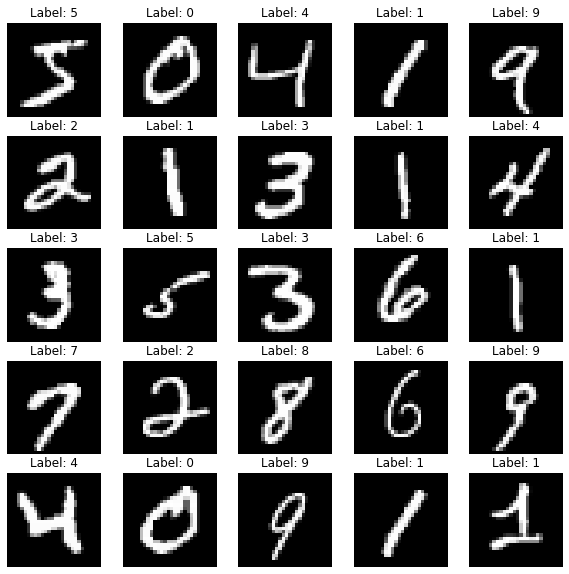

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

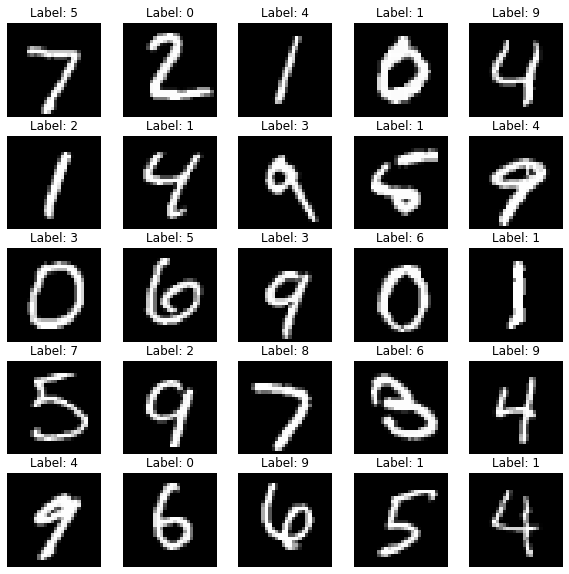

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

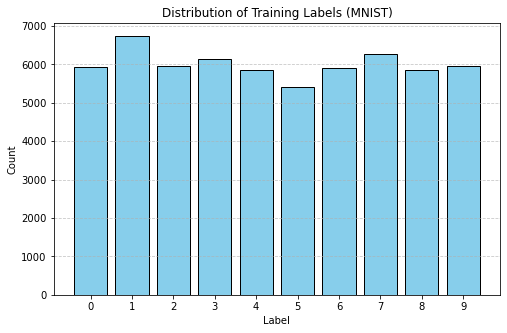

In [5]:

plt.figure(figsize=(8, 5))
plt.hist(train_labels, bins=np.arange(11) - 0.5, rwidth=0.8, color='skyblue', edgecolor='black')
plt.title('Distribution of Training Labels (MNIST)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks(np.arange(10))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28)),
    tf.keras.layers.Reshape(target_shape=(28,28,1)),
    tf.keras.layers.Conv2D(filters=12, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10)
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape (Reshape)           (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 12)        120       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 12)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 2028)              0         
                                                                 
 dense (Dense)               (None, 10)                20290     
                                                                 
Total params: 20410 (79.73 KB)
Trainable params: 20410 (79.73 KB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])

In [9]:
history=model.fit(
  train_images,
  train_labels,
  epochs=5,
  validation_data=(test_images, test_labels)
)


Epoch 1/5


2024-01-28 21:59:24.783509: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2756 - accuracy: 0.9240 - val_loss: 0.1044 - val_accuracy: 0.9713
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0916 - accuracy: 0.9738 - val_loss: 0.0726 - val_accuracy: 0.9777
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0679 - accuracy: 0.9799 - val_loss: 0.0639 - val_accuracy: 0.9799
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0589 - accuracy: 0.9826 - val_loss: 0.0602 - val_accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0520 - accuracy: 0.9843 - val_loss: 0.0631 - val_accuracy: 0.9803


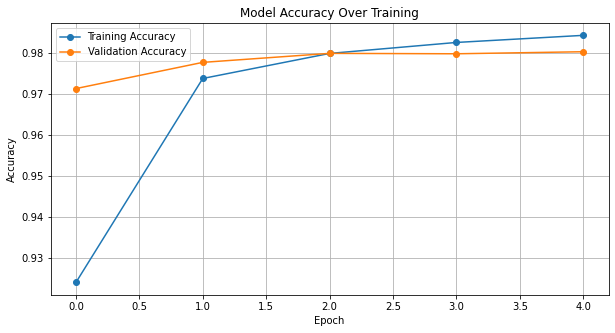

In [10]:
plt.figure(figsize=(10, 5))

plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')

plt.title('Model Accuracy Over Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
## Convert to a TensorFlow Lite model
## First, here's a converted model with no quantization:



In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/sraj/tmp1y9c5g68/assets


INFO:tensorflow:Assets written to: /tmp/sraj/tmp1y9c5g68/assets
2024-01-28 21:59:57.256065: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-01-28 21:59:57.256147: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-01-28 21:59:57.256441: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/sraj/tmp1y9c5g68
2024-01-28 21:59:57.257173: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-01-28 21:59:57.257188: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/sraj/tmp1y9c5g68
2024-01-28 21:59:57.259424: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:375] MLIR V1 optimization pass is not enabled
2024-01-28 21:59:57.260029: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-01-28 21:59:57.285426: I tensorflow/cc/saved_model/loader.cc:215] Runnin

It's now a TensorFlow Lite model, but it's still using 32-bit float values for all parameter data.



Convert using dynamic range quantization

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/sraj/tmpxkptuhjq/assets


INFO:tensorflow:Assets written to: /tmp/sraj/tmpxkptuhjq/assets
2024-01-28 21:59:57.932787: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-01-28 21:59:57.932832: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-01-28 21:59:57.933035: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/sraj/tmpxkptuhjq
2024-01-28 21:59:57.933793: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-01-28 21:59:57.933810: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/sraj/tmpxkptuhjq
2024-01-28 21:59:57.936217: I tensorflow/cc/saved_model/loader.cc:231] Restoring SavedModel bundle.
2024-01-28 21:59:57.961612: I tensorflow/cc/saved_model/loader.cc:215] Running initialization op on SavedModel bundle at path: /tmp/sraj/tmpxkptuhjq
2024-01-28 21:59:57.970026: I tensorflow/cc/saved_model/loade

The model is now a bit smaller with quantized weights, but other variable data is still in float format.



# Convert using float fallback quantization

To quantize the variable data (such as model input/output and intermediates between layers), you need to provide a RepresentativeDataset. This is a generator function that provides a set of input data that's large enough to represent typical values. It allows the converter to estimate a dynamic range for all the variable data. (The dataset does not need to be unique compared to the training or evaluation dataset.) To support multiple inputs, each representative data point is a list and elements in the list are fed to the model according to their indices.



In [14]:
def representative_data_gen():
    for input_value in tf.data.Dataset.from_tensor_slices(train_images).batch(1).take(100):
        yield [input_value]


In [18]:
print(tf.data.Dataset.from_tensor_slices(train_images).batch(1))

<_BatchDataset element_spec=TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name=None)>


2024-01-28 22:01:32.857220: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


In [30]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/sraj/tmpyyla20te/assets


INFO:tensorflow:Assets written to: /tmp/sraj/tmpyyla20te/assets
/cvmfs/sft.cern.ch/lcg/views/LCG_105/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-01-25 20:03:37.791575: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-01-25 20:03:37.791732: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-01-25 20:03:37.792129: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/sraj/tmpyyla20te
2024-01-25 20:03:37.793465: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-01-25 20:03:37.793491: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/sraj/tmpyyla20te
2024-01-25 20:03:37.797212: I tensorflow/cc/saved_model/loader.cc:231]

Now all weights and variable data are quantized, and the model is significantly smaller compared to the original TensorFlow Lite model.

However, to maintain compatibility with applications that traditionally use float model input and output tensors, the TensorFlow Lite Converter leaves the model input and output tensors in float:

In [34]:
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.float32'>
output:  <class 'numpy.float32'>


In [35]:
interpreter.get_input_details()

[{'name': 'serving_default_input_1:0',
  'index': 0,
  'shape': array([ 1, 28, 28], dtype=int32),
  'shape_signature': array([-1, 28, 28], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

In [36]:
interpreter.get_output_details()

[{'name': 'StatefulPartitionedCall:0',
  'index': 19,
  'shape': array([ 1, 10], dtype=int32),
  'shape_signature': array([-1, 10], dtype=int32),
  'dtype': numpy.float32,
  'quantization': (0.0, 0),
  'quantization_parameters': {'scales': array([], dtype=float32),
   'zero_points': array([], dtype=int32),
   'quantized_dimension': 0},
  'sparsity_parameters': {}}]

That's usually good for compatibility, but it won't be compatible with devices that perform only integer-based operations, such as the Edge TPU.



Additionally, the above process may leave an operation in float format if TensorFlow Lite doesn't include a quantized implementation for that operation. This strategy allows conversion to complete so you have a smaller and more efficient model, but again, it won't be compatible with integer-only hardware. (All ops in this MNIST model have a quantized implementation.)



# Convert using integer-only quantization

To quantize the input and output tensors, and make the converter throw an error if it encounters an operation it cannot quantize, convert the model again with some additional parameters:



In [37]:
def representative_data_gen():
  for input_value in tf.data.Dataset.from_tensor_slices(train_images).batch(1).take(100):
    yield [input_value]

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.representative_dataset = representative_data_gen
# Ensure that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
# Set the input and output tensors to uint8 (APIs added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8

tflite_model_quant = converter.convert()

INFO:tensorflow:Assets written to: /tmp/sraj/tmpmz2orfqg/assets


INFO:tensorflow:Assets written to: /tmp/sraj/tmpmz2orfqg/assets
/cvmfs/sft.cern.ch/lcg/views/LCG_105/x86_64-el9-gcc13-opt/lib/python3.9/site-packages/tensorflow/lite/python/convert.py:887: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(
2024-01-25 20:46:42.004513: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:364] Ignored output_format.
2024-01-25 20:46:42.004590: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:367] Ignored drop_control_dependency.
2024-01-25 20:46:42.005139: I tensorflow/cc/saved_model/reader.cc:45] Reading SavedModel from: /tmp/sraj/tmpmz2orfqg
2024-01-25 20:46:42.006335: I tensorflow/cc/saved_model/reader.cc:91] Reading meta graph with tags { serve }
2024-01-25 20:46:42.006363: I tensorflow/cc/saved_model/reader.cc:132] Reading SavedModel debug info (if present) from: /tmp/sraj/tmpmz2orfqg
2024-01-25 20:46:42.010268: I tensorflow/cc/saved_model/loader.cc:231]

The internal quantization remains the same as above, but you can see the input and output tensors are now integer format:



In [38]:
interpreter = tf.lite.Interpreter(model_content=tflite_model_quant)
input_type = interpreter.get_input_details()[0]['dtype']
print('input: ', input_type)
output_type = interpreter.get_output_details()[0]['dtype']
print('output: ', output_type)

input:  <class 'numpy.uint8'>
output:  <class 'numpy.uint8'>


Now you have an integer quantized model that uses integer data for the model's input and output tensors, so it's compatible with integer-only hardware such as the [Edge TPU](https://coral.ai/).



Save the models as files

You'll need a .tflite file to deploy your model on other devices. So let's save the converted models to files and then load them when we run inferences below.



In [39]:
import pathlib

In [44]:
tflite_models_dir = pathlib.Path("/tmp/mnist_tflite_models/")
tflite_models_dir.mkdir(exist_ok=True, parents=True)


# Save the unquantized/float model:
tflite_model_file = tflite_models_dir/"mnist_model.tflite"
tflite_model_file.write_bytes(tflite_model)


84820

In [45]:
# Save the quantized model:
tflite_model_quant_file = tflite_models_dir/"mnist_model_quant.tflite"
tflite_model_quant_file.write_bytes(tflite_model_quant)

24608

### Run the TensorFlow Lite models
Now we'll run inferences using the TensorFlow Lite Interpreter to compare the model accuracies.

First, we need a function that runs inference with a given model and images, and then returns the predictions:

In [46]:
def run_tflite_model(tflite_file, test_image_indices):
  global test_images

  # Initialize the interpreter
  interpreter = tf.lite.Interpreter(model_path=str(tflite_file))
  interpreter.allocate_tensors()

  input_details = interpreter.get_input_details()[0]
  output_details = interpreter.get_output_details()[0]

  predictions = np.zeros((len(test_image_indices),), dtype=int)
  for i, test_image_index in enumerate(test_image_indices):
    test_image = test_images[test_image_index]

    # Check if the input type is quantized, then rescale input data to uint8
    if input_details['dtype'] == np.uint8:
      input_scale, input_zero_point = input_details["quantization"]
      test_image = test_image / input_scale + input_zero_point

    test_image = np.expand_dims(test_image, axis=0).astype(input_details["dtype"])
    interpreter.set_tensor(input_details["index"], test_image)
    interpreter.invoke()
    output = interpreter.get_tensor(output_details["index"])[0]

    predictions[i] = output.argmax()

  return predictions

# Test the models on one image
Now we'll compare the performance of the float model and quantized model:

* tflite_model_file is the original TensorFlow Lite model with floating-point data.
* tflite_model_quant_file is the last model we converted using integer-only quantization (it uses uint8 data for input and output).

Let's create another function to print our predictions:

In [47]:
import matplotlib.pylab as plt

# Change this to test a different image
test_image_index = 1

## Helper function to test the models on one image
def test_model(tflite_file, test_image_index, model_type):
  global test_labels

  predictions = run_tflite_model(tflite_file, [test_image_index])

  plt.imshow(test_images[test_image_index])
  template = model_type + " Model \n True:{true}, Predicted:{predict}"
  _ = plt.title(template.format(true= str(test_labels[test_image_index]), predict=str(predictions[0])))
  plt.grid(False)

Now test the float model:



INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


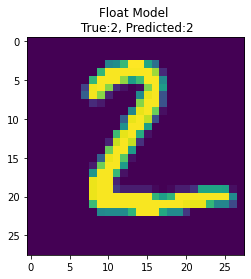

In [48]:
test_model(tflite_model_file, test_image_index, model_type="Float")

And test the quantized model:



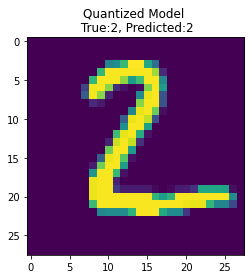

In [49]:
test_model(tflite_model_quant_file, test_image_index, model_type="Quantized")

## Evaluate the models on all images
Now let's run both models using all the test images we loaded at the beginning of this tutorial:




In [50]:
def evaluate_model(tflite_file, model_type):
  global test_images
  global test_labels

  test_image_indices = range(test_images.shape[0])
  predictions = run_tflite_model(tflite_file, test_image_indices)

  accuracy = (np.sum(test_labels== predictions) * 100) / len(test_images)

  print('%s model accuracy is %.4f%% (Number of test samples=%d)' % (
      model_type, accuracy, len(test_images)))

Evaluate the float model:



In [51]:
evaluate_model(tflite_model_file, model_type="Float")

Float model accuracy is 97.9000% (Number of test samples=10000)


Evaluate the quantized model:



In [52]:
evaluate_model(tflite_model_quant_file, model_type="Quantized")

Quantized model accuracy is 97.9400% (Number of test samples=10000)
